In [3]:
import numpy as np
import pandas as pd
import csv
with open(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv") as dms_GFP_datei:
    dms_GFP_datei_object = csv.reader(dms_GFP_datei, delimiter=',')
    print(dms_GFP_datei_object)
    for row in dms_GFP_datei_object:
        print(row)
original_datei = pd.read_csv(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv")
print(original_datei)
#Einlesen

letzter_buchstabe = []
for index, row in original_datei.iterrows():
    last_character = row["mutant"][-1]
    letzter_buchstabe.append(last_character)
letzter_buchstabe_df = pd.DataFrame(letzter_buchstabe, columns=["New_AS"])
print(letzter_buchstabe_df)
#Letzter Buchstabe in jeder Zeile

number_mutations = original_datei["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
print(number_mutations_Single)
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df = letzter_buchstabe_df[number_mutations_Single]
print(single_mutants_df)
#Filtert alle True Zeilen aus beiden Dataframes und erstellt ein neues Dataframe. Er übernimmt automatisch die Filterung nac

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['M153L:Q184H', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYILADKQKNGIKVNFKIRHNIEDGSVQLADHYQHNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK', '3.59478328018', '1']
['M153L:Q177L', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYILADKQKNGIKVNFKIRHNIEDGSVLLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK', '3.89309479775', '1']
['M153L:Q157R:N164D:A206S:T225A:Y237C', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYILADKRKNGIKVDFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSSLSKDPNEKRDHMVLLEFVAAAGITHGMDELCK', '3.70628995189', '1']
['M153L:Q157L', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTL

In [ ]:
dataset = [
    {'amino_acid': 'A', 'position': 10},
    {'amino_acid': 'C', 'position': 20},
    {'amino_acid': 'D', 'position': 10},
    {'amino_acid': 'F', 'position': 30},
    {'amino_acid': 'A', 'position': 10},
    {'amino_acid': 'E', 'position': 20},
]
dms_scores = {
    'A': {10: [0.5, 0.3, 0.7]},
    'C': {20: [1.2, 1.1]},
    'D': {10: [-0.3, -0.2]},
    'E': {20: [-0.7]},
    'F': {30: [2.1, 2.0, 2.2]},
}

correlated_scores = []
for entry in dataset:
    amino_acid = entry['amino_acid']
    position = entry['position']
    if amino_acid in dms_scores and position in dms_scores[amino_acid]:
        scores = dms_scores[amino_acid][position]
        correlated_scores.extend(scores)
    else:
        correlated_scores.append(None)

# Create a bar plot
plt.bar(range(len(dataset)), correlated_scores)
plt.xticks(range(len(dataset)), [f"{entry['amino_acid']}-{entry['position']}" for entry in dataset])
plt.xlabel('Amino Acid - Position')
plt.ylabel('DMS Score')
plt.title('Correlation between Amino Acids and DMS Scores by Position')

# Show the plot
plt.show()


In [4]:
dms_score_df = []
for index, row in original_datei.iterrows():
    dms_score = row["DMS_score"]
    dms_score_df.append(dms_score)
dms_score_df_alle = pd.DataFrame(dms_score_df, columns=["Fitness_Score"])
#print(dms_score_df_alle)
#erstellt Dataframe mit allen DMS-scores und der jeweiligen Experimentnummer
dms_score_filtered = dms_score_df_alle[number_mutations_Single]
#print(dms_score_filtered)
dms_score_filtered_newAS = single_mutants_df.join(dms_score_filtered)
#print(dms_score_filtered_newAS)
mutations_pos = []
for index, row in original_datei.iterrows():
    mutations_pos_nummer = row["mutant"][1:-1]
    mutations_pos.append(mutations_pos_nummer)
mutations_pos_df = pd.DataFrame(mutations_pos, columns=["Position"])
#print(mutations_pos_df)
#Entfernt erstmal nur das erste und letzte Zeichen
number_mutations = original_datei["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#print(number_mutations_Single)
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df_pos = mutations_pos_df[number_mutations_Single]
#print(single_mutants_df_pos)
#Erstellt ein Dataframe, dass die Positionen innerhalb des Proteins aller Einzelmutanten zeigt
mutations_pos_df_mit_scores = single_mutants_df_pos.join(dms_score_filtered)
#print(mutations_pos_df_mit_scores)
new_column = mutations_pos_df_mit_scores["Position"]
Roman_1 = dms_score_filtered_newAS.join(new_column)
Roman_1 = Roman_1[["Position", "New_AS", "Fitness_Score"]]
print(Roman_1)
#Erstellt neues Dataframe mit Position, neuer AS und DMS-score

      Position New_AS  Fitness_Score
4            3      R       3.738586
48           3      Q       3.750487
703          3      E       3.666278
924          3      M       3.698336
1160         3      T       3.629775
...        ...    ...            ...
51709      237      N       3.809468
51710      237      C       3.760217
51711      237      D       3.754101
51712      237      F       3.673173
51713      237      H       3.735417

[1084 rows x 3 columns]


In [4]:
Roman_1

,Position,New_AS,Fitness_Score
4,3,R,3.738586
48,3,Q,3.750487
703,3,E,3.666278
924,3,M,3.698336
1160,3,T,3.629775
...,...,...,...
51709,237,N,3.809468
51710,237,C,3.760217
51711,237,D,3.754101
51712,237,F,3.673173


In [6]:
grouped_by_amino_acid = Roman_1.groupby('New_AS')
print(grouped_by_amino_acid)


In [7]:
grouped_by_position = Roman_1.groupby("Position")
print(grouped_by_position)


In [10]:
mean_dms_by_amino_acid = grouped_by_amino_acid["Fitness_Score"].mean()
median_dms_by_amino_acid = grouped_by_amino_acid["Fitness_Score"].median()
print(mean_dms_by_amino_acid)
print(median_dms_by_amino_acid)
mean_dms_by_position = grouped_by_position["Fitness_Score"].mean()
median_dms_by_position = grouped_by_position["Fitness_Score"].median()
print(mean_dms_by_position)
print(median_dms_by_position)

New_AS
A    3.568873
C    3.484644
D    3.243770
E    3.344491
F    3.290031
G    3.471302
H    3.521980
I    3.561838
K    3.430530
L    3.543811
M    3.638662
N    3.539638
P    2.641112
Q    3.452677
R    3.101493
S    3.465196
T    3.635548
V    3.557836
W    3.552605
Y    3.625013
Name: Fitness_Score, dtype: float64
New_AS
A    3.635771
C    3.659148
D    3.618095
E    3.647804
F    3.638083
G    3.641087
H    3.655410
I    3.627550
K    3.661849
L    3.654187
M    3.670929
N    3.658432
P    3.214552
Q    3.648993
R    3.676710
S    3.639505
T    3.681731
V    3.667263
W    3.583799
Y    3.649549
Name: Fitness_Score, dtype: float64
Position
10     3.537131
100    3.086886
101    3.684315
102    3.546847
103    3.554441
         ...   
95     3.625334
96     1.414276
97     3.703226
98     3.020505
99     3.715067
Name: Fitness_Score, Length: 233, dtype: float64
Position
10     3.544708
100    3.323669
101    3.683229
102    3.609839
103    3.570019
         ...   
95     3.640983

In [ ]:
for amino_acid, group in grouped_by_amino_acid:
    # Perform operations on each group
    print(amino_acid, group)


In [14]:
from scipy.stats import kruskal
# Assuming you have already grouped the data by amino acid
grouped_by_amino_acid = Roman_1.groupby("New_AS")
# Create an empty list to store the DMS scores for each group
dms_scores_per_group = []
# Iterate over each group and extract the DMS scores
for amino_acid, group in grouped_by_amino_acid:
    dms_scores_per_group.append(group['Fitness_Score'])
# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*dms_scores_per_group)
# Print the test results
print("Kruskal-Wallis Test")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis Test
Statistic: 59.55225321220496
P-value: 4.554297682002578e-06


In [16]:
from scipy.stats import f_oneway

# Assuming you have already grouped the data by mutation position
grouped_by_position = Roman_1.groupby('Position')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_position:
    dms_scores_per_group.append(group['Fitness_Score'])

# Perform the ANOVA
statistic, p_value = f_oneway(*dms_scores_per_group)

# Print the test results
print("ANOVA")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")
#In the case of a one-way ANOVA, the test statistic follows an F-distribution. The F-statistic represents the ratio of the between-group variability to the within-group variability. A larger F-statistic indicates a greater difference between the groups' means relative to the variability within each group.
#Extension of t-test for independent samples and checks if there are statistically significant differences between >2 groups
#ANOVA without repeated measurements weil alle Gruppen unabhängig sind
#Independent variable = position
#Dependent variable = dms-score
#Nullhypothese = Kein Unterschied zwischen der Mittelwerte der einzelnen Gruppen
#H1-Hypothese = Es gibt einen Unterschied zwischen mindestens 2 Gruppen


ANOVA
Statistic: 5.099899894789866
P-value: 1.3068900184318954e-68


In [26]:
from scipy.stats import f_oneway

# Assuming you have already grouped the data by mutation position
grouped_by_amino_acid = Roman_1.groupby('New_AS')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group_new_AS = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_amino_acid:
    dms_scores_per_group.append(group['Fitness_Score'])

# Perform the ANOVA
statistic, p_value = f_oneway(*dms_scores_per_group)

# Print the test results
print("ANOVA")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

ANOVA
Statistic: 4.319844180314801
P-value: 3.366550191632122e-89


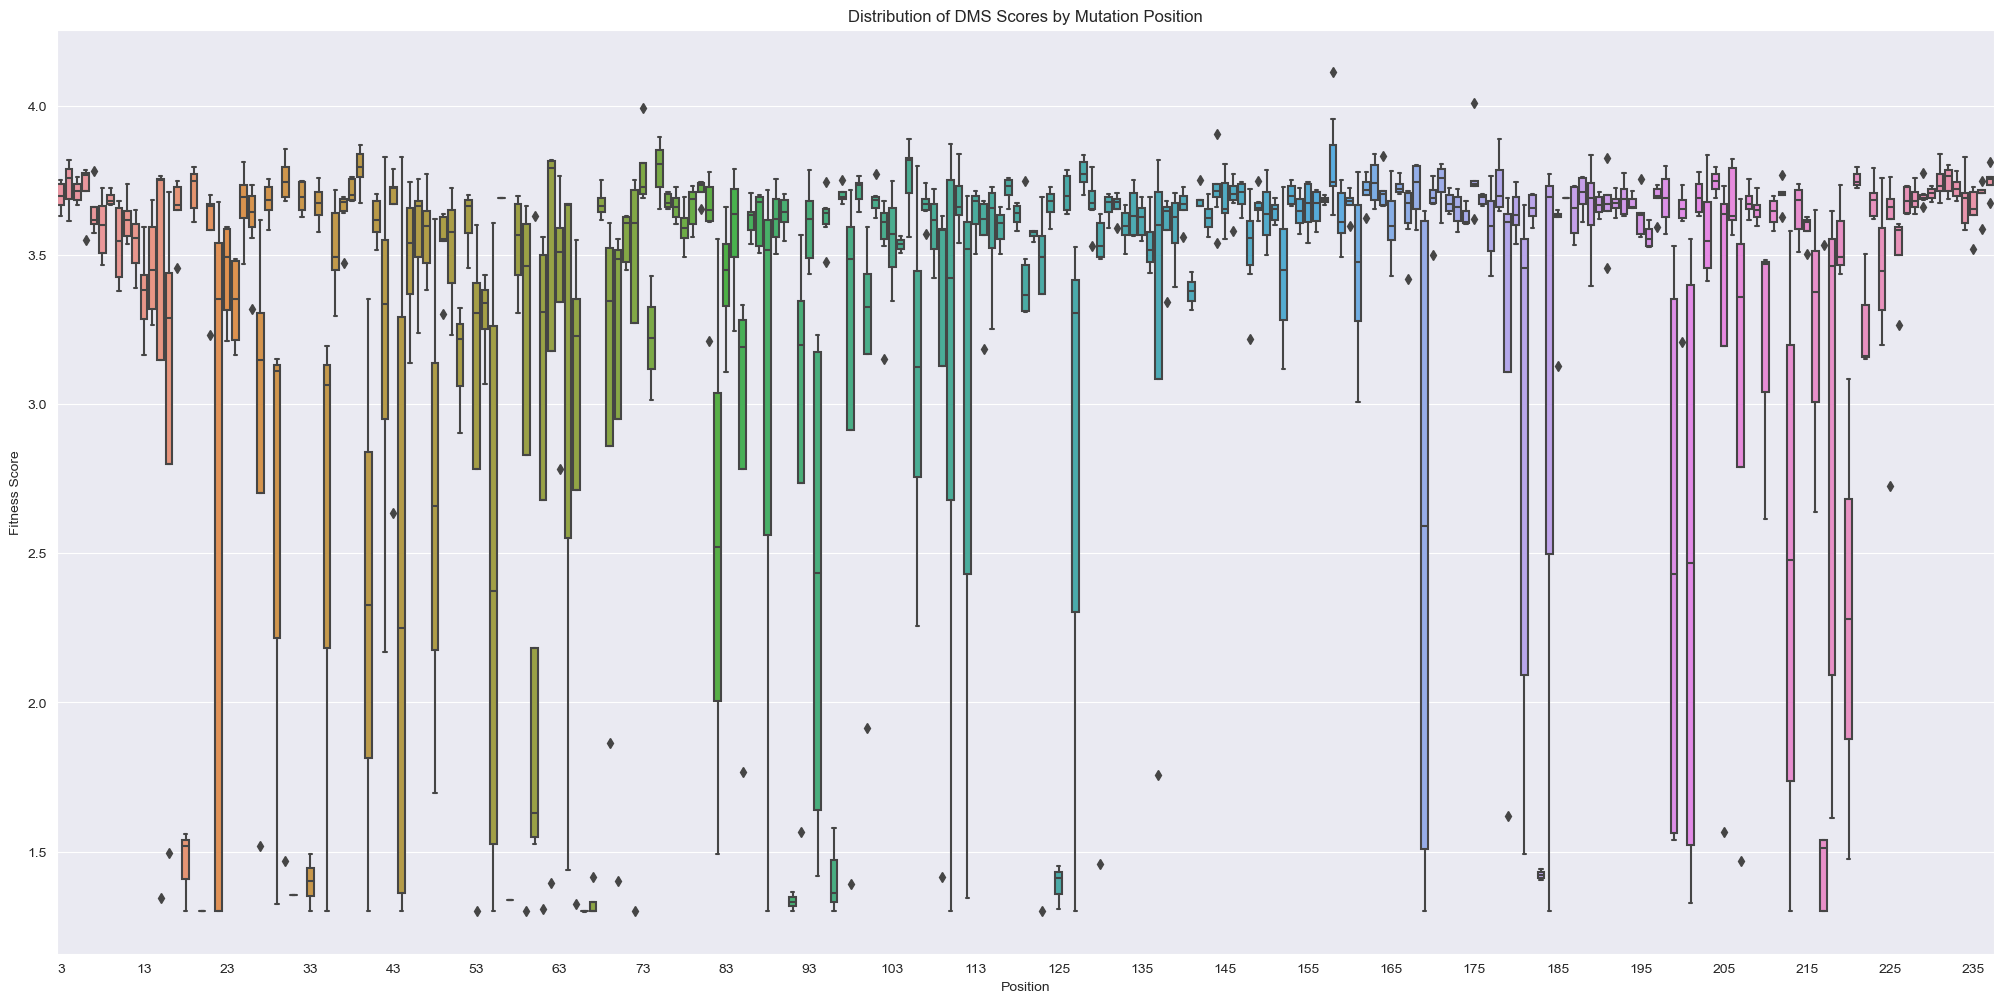

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already grouped the data by mutation position
grouped_by_position = Roman_1.groupby('Position')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_position:
    dms_scores_per_group.append(group['Fitness_Score'])

# Create a box plot
sns.boxplot(x='Position', y='Fitness_Score', data=Roman_1)
plt.xlabel('Position')
plt.ylabel('Fitness Score')
plt.title('Distribution of DMS Scores by Mutation Position')
plt.xticks(range(0, len(grouped_by_position), 10))
plt.gcf().set_size_inches(25, 12)
plt.show()


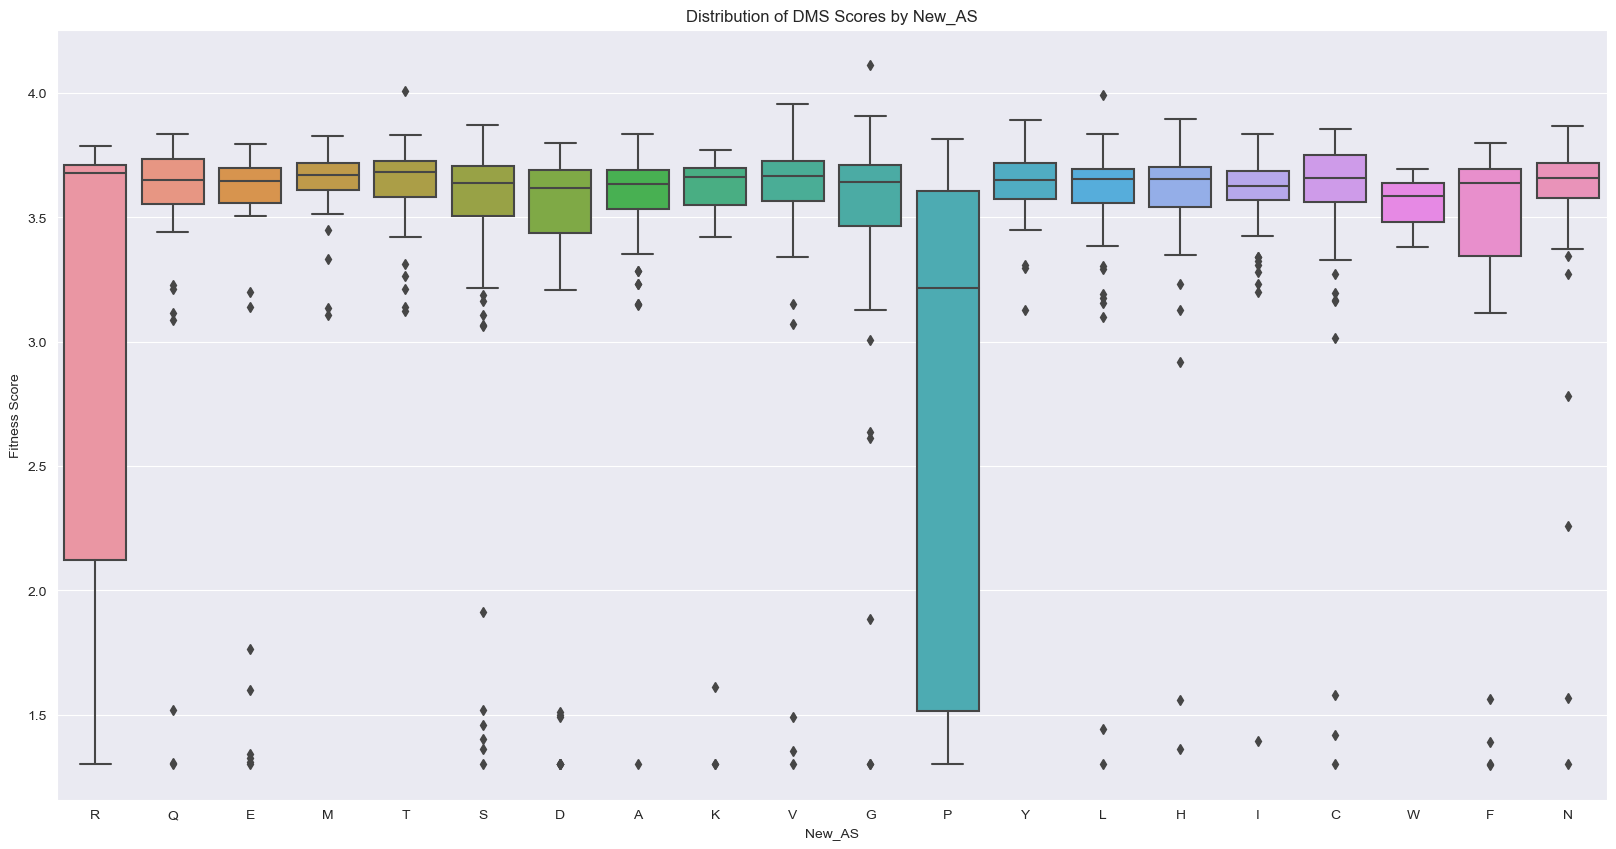

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already grouped the data by mutation position
grouped_by_amino_acid = Roman_1.groupby('New_AS')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group_new_AS = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_amino_acid:
    dms_scores_per_group_new_AS.append(group['Fitness_Score'])

# Create a box plot
sns.boxplot(x='New_AS', y='Fitness_Score', data=Roman_1)
plt.xlabel('New_AS')
plt.ylabel('Fitness Score')
plt.title('Distribution of DMS Scores by New_AS')
#plt.xticks(range(0, len(grouped_by_amino_acid), 10))
plt.gcf().set_size_inches(20, 10)
plt.show()
#Box hat 50% aller Werte, von 25% bis 75%
#Die Whisker gehen von 0%-25% und 75-100%. Ausreißer sind vorhanden
#Arginin (R) und Prolin (P) haben große Boxen, das heißt sie haben eine hohe Varianz innerhalb ihrer Gruppe. Somit haben solche Mutationen, die zu P oder R werden eine sehr hohe Spanne an Fitness scores --> Interessant anzuschauen
#Es scheint daher so, als wäre dieser Effekt für R und P positionsabhängig

ValueError: Unknown format code 'd' for object of type 'float'

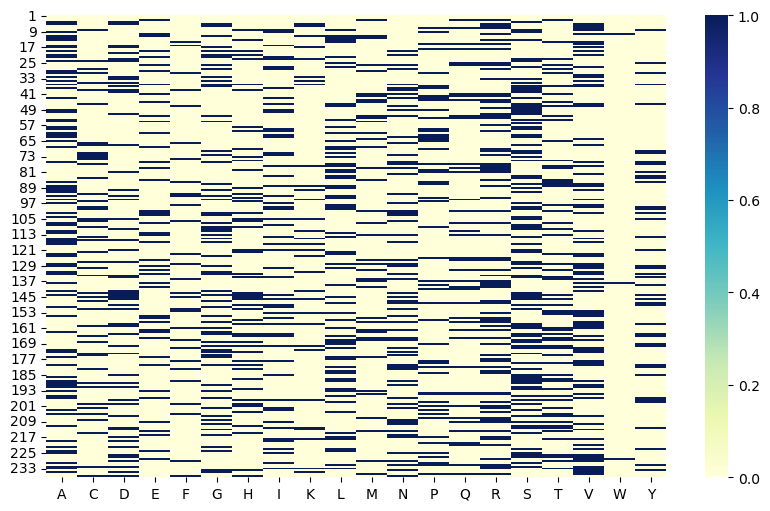

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'Roman_1' with columns 'Position' and 'New_AS'

# Convert 'Position' column to numeric type
Roman_1['Position'] = pd.to_numeric(Roman_1['Position'], errors='coerce')

# Get all unique mutation positions
all_positions = [str(i) for i in range(1, int(Roman_1['Position'].max()) + 1)]

# Create a cross-tabulation between mutation positions and new amino acids
cross_tab = pd.crosstab(Roman_1['Position'].astype(str), Roman_1['New_AS'])

# Convert the values in the cross-tabulation dataframe to integers
cross_tab = cross_tab.astype(int)

# Create a new DataFrame with the desired index
index_df = pd.DataFrame(index=all_positions)

# Merge the new DataFrame with the cross-tabulation DataFrame
merged_cross_tab = index_df.merge(cross_tab, left_index=True, right_index=True, how='left').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_cross_tab, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('New Amino Acid')
plt.ylabel('Mutation Position')
plt.title('Correlation between Mutation Position and New Amino Acid')
plt.show()


In [40]:
Roman_1

,Position,New_AS,Fitness_Score
4,3,R,3.738586
48,3,Q,3.750487
703,3,E,3.666278
924,3,M,3.698336
1160,3,T,3.629775
...,...,...,...
51709,237,N,3.809468
51710,237,C,3.760217
51711,237,D,3.754101
51712,237,F,3.673173


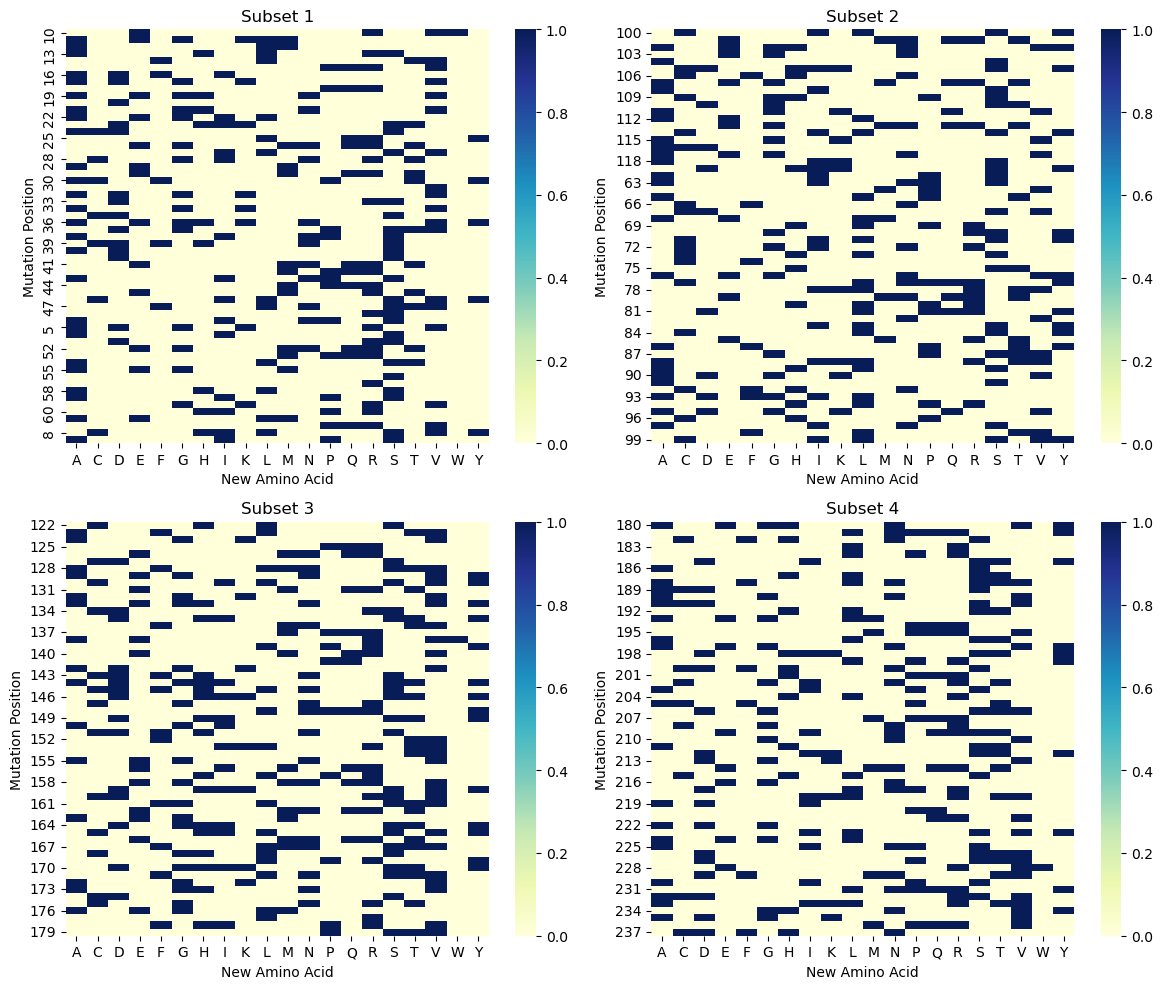

In [52]:
# Split mutations into subsets
mutation_subsets = np.array_split(Roman_1['Position'].unique(), 4)  # Split into 4 subsets

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterate over subsets and create heatmaps
for i, subset in enumerate(mutation_subsets):
    row = i // 2
    col = i % 2

    # Filter data based on subset
    subset_df = Roman_1[Roman_1['Position'].isin(subset)]

    # Create cross-tabulation
    cross_tab = pd.crosstab(subset_df['Position'], subset_df['New_AS'])

    # Create heatmap in the corresponding subplot
    sns.heatmap(cross_tab, cmap='YlGnBu', annot=False, fmt='d', ax=axes[row, col])
    axes[row, col].set_xlabel('New Amino Acid')
    axes[row, col].set_ylabel('Mutation Position')
    axes[row, col].set_title(f'Subset {i+1}')

plt.tight_layout()
plt.show()


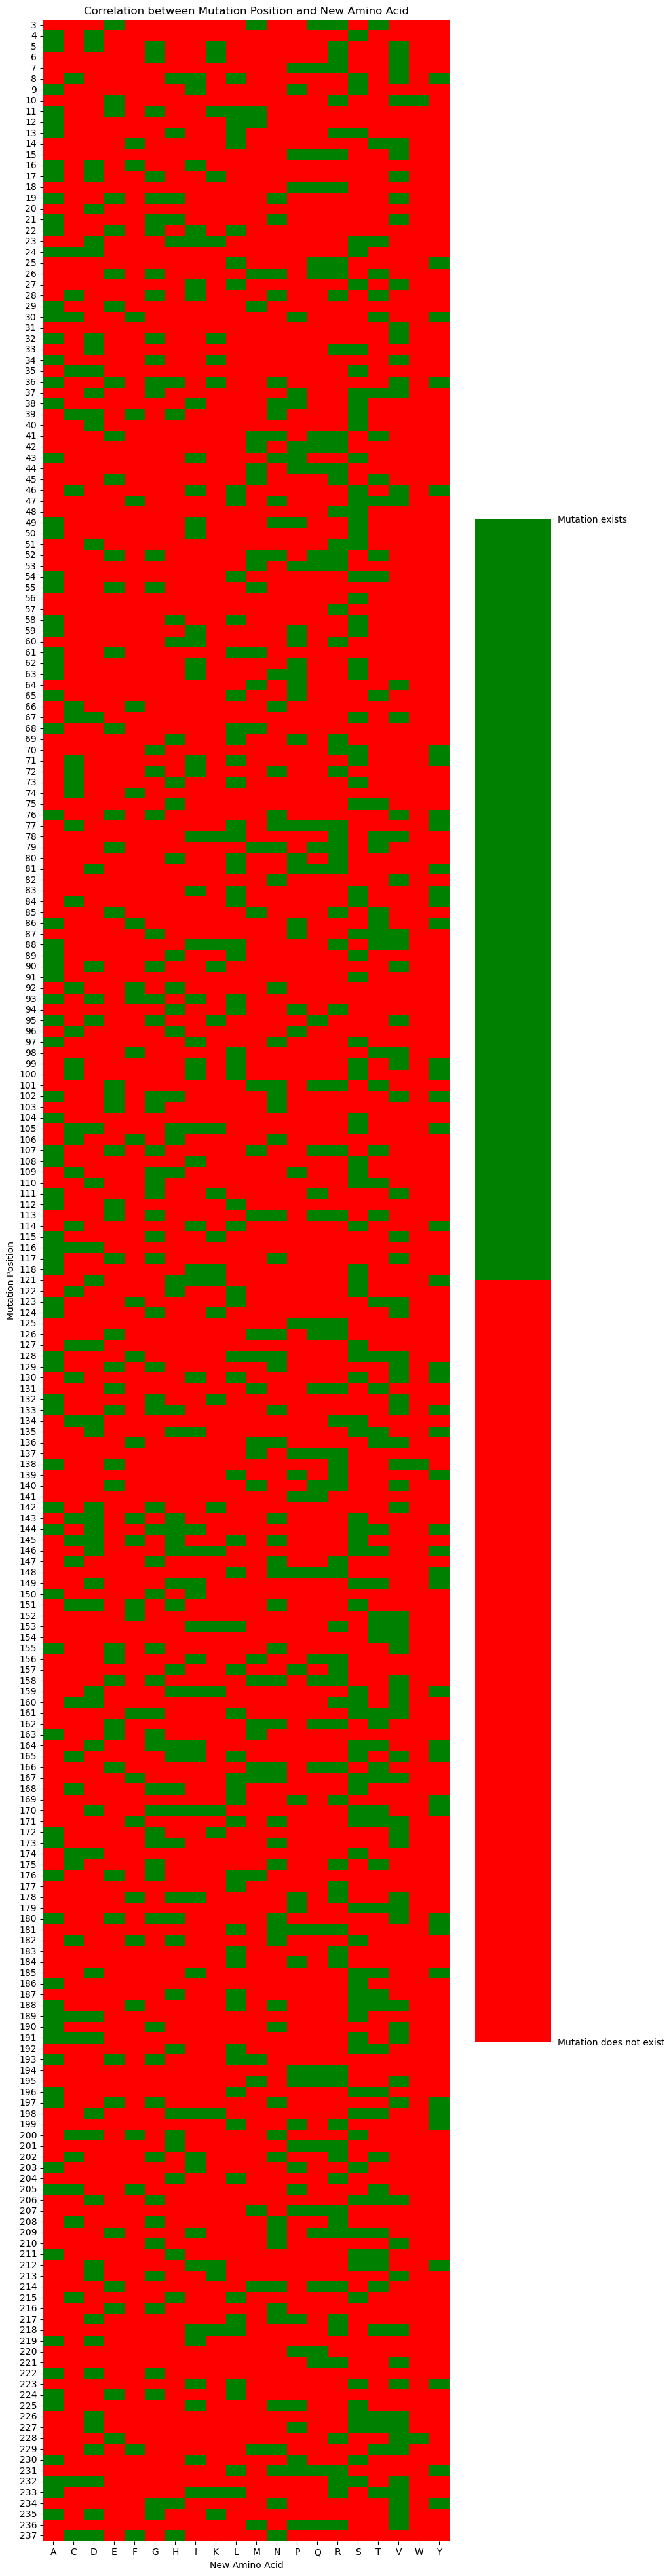

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming you have a dataframe named 'Roman_1' with columns 'Position' and 'New_AS'

# Define a custom sorting function
def position_sort(position):
    if position.isdigit():
        return int(position)
    else:
        return position

# Sort the mutation positions using the custom sorting function
sorted_positions = sorted(Roman_1['Position'].unique(), key=position_sort)

# Create a cross-tabulation between mutation positions and new amino acids
cross_tab = pd.crosstab(Roman_1['Position'], Roman_1['New_AS'])
cross_tab_sorted = cross_tab.reindex(sorted_positions)

# Create a heatmap
plt.figure(figsize=(10, 50))
# Create a custom colormap with two colors
custom_colors = ['red', 'green']
cmap = ListedColormap(custom_colors)
sns.heatmap(cross_tab_sorted, cmap=cmap, annot=False, fmt='d')
# Get the colorbar object from the heatmap
colorbar = plt.gca().collections[0].colorbar

# Set the colorbar tick labels
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Mutation does not exist', 'Mutation exists'])

plt.xlabel('New Amino Acid')
plt.ylabel('Mutation Position')
plt.title('Correlation between Mutation Position and New Amino Acid')
plt.show()


In [72]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have a dataframe named 'Roman_1' with columns 'Position', 'New_AS', and 'DMS_score'

# Perform the ANOVA
model = ols('Fitness_Score ~ Position + New_AS', data=Roman_1).fit()
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print('ANOVA:')
print(anova_table)
#df = degrees of freedom
#sum_sq = The sum of squares quantifies the variation explained by each factor. Higher values indicate more significant effects.
#mean_sq = It is obtained by dividing the sum of squares by the respective degrees of freedom. The mean square represents the average variation explained by each factor.
#F = It is the ratio of the mean square of each factor to the mean square of the residual. The F-value indicates the significance of the factor in explaining the variation in the DMS score. Higher F-values suggest a more significant effect.
#PR(>F) = A smaller p-value suggests stronger evidence against the null hypothesis and indicates a significant effect.

##Position hat einen signifikanten Einfluss --> Es gibt signifikante Unterschiede im Fitness-score zwischen verschiedenen mutierten Positionen.

##Die neue Aminosäure hat auch einen signifikanten Einfluss --> Es gibt signifikante Unterschiede im Fitness-score zwischen verschiedenen neuen Aminosäuren.

##Der Residual repräsentiert die unerklärte Varianz des Datensets, die nicht durch Position oder neue Aminosäure erklärbar sind.

###Es scheint eine Korrelation zwischen dem Fitness-score und der Position bzw. der neuen Aminosäure zu geben.

ANOVA:
             df      sum_sq   mean_sq         F        PR(>F)
Position  232.0  243.851576  1.051084  6.003194  1.301208e-82
New_AS     19.0   29.717435  1.564076  8.933106  1.507908e-23
Residual  832.0  145.672832  0.175088       NaN           NaN


In [74]:
# Assuming you have performed the ANOVA and stored the result in 'anova_result'
sum_sq_position = anova_table.loc['Position', 'sum_sq']
SST = anova_table['sum_sq'].sum()

eta_squared_position = sum_sq_position / SST
print(eta_squared_position)
#Effect Size Calculation: Common effect size measures for ANOVA include eta-squared (η²) or partial eta-squared (η²p).
#These measures indicate the proportion of variance in the DMS score that can be explained by the mutated position or the new amino acid.
#The higher the eta-squared value, the more influence the mutated position has on the DMS score.

##58% der Varianz können durch die Position erklärt werden! --> Starke Beziehung zwischen mutierter Position und DMS-score

0.5816489450614979


In [75]:
sum_sq_new_as = anova_table.loc['New_AS', 'sum_sq']
SST = anova_table['sum_sq'].sum()

eta_squared_new_as = sum_sq_new_as / SST
print(eta_squared_new_as)
##Nur 7% der Varianz werden hier erklärt. Das heißt, die neu entstandene Aminosäure hat nicht so einen großen Einfluss. --> Schwache Beziehung
#Die restliche Varianz steck im residual

0.07088375323670729


In [78]:
#Post-hoc-test --> Tukey's Honestly Significant Difference

import pandas as pd
import statsmodels.stats.multicomp as mc

# Assuming you have the ANOVA results in the variable 'anova_table'
# And the dataframe with columns 'Position', 'New_AS', and 'Fitness_Score' is named 'Roman_1'

# Extract the group means and standard deviations
group_means = Roman_1.groupby(['Position', 'New_AS']).mean()['Fitness_Score']
group_std = Roman_1.groupby(['Position', 'New_AS']).std()['Fitness_Score']


mc = mc.MultiComparison(Roman_1['Fitness_Score'], Roman_1['Position'].astype(str) + ' - ' + Roman_1['New_AS'])

# Perform Tukey's HSD test
tukey_result = mc.tukeyhsd()

# Print the results
print(tukey_result.summary())


C:\Users\roman\Anaconda dl\envs\Data_science_RARL\lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\roman\Anaconda dl\envs\Data_science_RARL\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming you have the ANOVA results in the variable 'anova_table'
# And the dataframe with columns 'Position', 'New_AS', and 'Fitness_Score' is named 'Roman_1'

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(Roman_1['Fitness_Score'], Roman_1[['Position', 'New_AS']])

# Print the results
print(tukey_result.summary())


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [80]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming you have the ANOVA results in the variable 'anova_table'
# And the dataframe with columns 'Position', 'New_AS', and 'Fitness_Score' is named 'Roman_1'

# Combine 'Position' and 'New_AS' columns into a single column
Roman_1['Group'] = Roman_1['Position'].astype(str) + '-' + Roman_1['New_AS']

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(Roman_1['Fitness_Score'], Roman_1['Group'])

# Print the results
print(tukey_result.summary())
#Takes too long and tries to divide by 0

C:\Users\roman\Anaconda dl\envs\Data_science_RARL\lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\roman\Anaconda dl\envs\Data_science_RARL\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

In [81]:
from statsmodels.stats.multitest import multipletests

# Assuming you have the ANOVA results in the variable 'anova_table'

# Extract the p-values from the ANOVA results
p_values = anova_table['PR(>F)']

# Apply the Bonferroni correction
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

# Add the corrected p-values to the ANOVA table
anova_table['Corrected P-value'] = corrected_p_values

# Print the updated ANOVA table with corrected p-values
print(anova_table)
#The correction did not have a lot of influence
#the Bonferroni correction is a conservative correction method that controls the family-wise error rate (FWER) by dividing the desired significance level (e.g., 0.05) by the number of comparisons.

             df      sum_sq   mean_sq         F        PR(>F)  \
Position  232.0  243.851576  1.051084  6.003194  1.301208e-82   
New_AS     19.0   29.717435  1.564076  8.933106  1.507908e-23   
Residual  832.0  145.672832  0.175088       NaN           NaN   

          Corrected P-value  
Position       3.903625e-82  
New_AS         4.523723e-23  
Residual                NaN  


In [ ]:
#Mehr Tests machen!
#ANOVA ungültig wegen Normalverteilung?
#-----------------------------------------------------------------------------------
#AS-EIGENSCHAFTEN